## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
df=pd.read_csv('/content/drive/MyDrive/T5/WEEK 1/Exam/Task (2) Dataset.csv')

In [81]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [82]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [83]:
df.isna().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

In [84]:
df.count()

City                   66639
Datetime               66639
TrafficIndexLive       66639
JamsCount              66639
JamsDelay              66639
JamsLength             66639
TrafficIndexWeekAgo    66639
TravelTimeHistoric     62772
TravelTimeLive         62772
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [86]:
df['TravelTimeHistoric']=df['TravelTimeHistoric'].fillna(df['TravelTimeHistoric'].mode()[0])
df['TravelTimeLive']=df['TravelTimeLive'].fillna(df['TravelTimeLive'].mode()[0])

In [87]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [88]:
df.isna().sum()

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
dtype: int64

In [89]:
df.duplicated().sum()

0

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

<ipython-input-90-0d3c31bf1b49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City', data=df, palette='viridis')


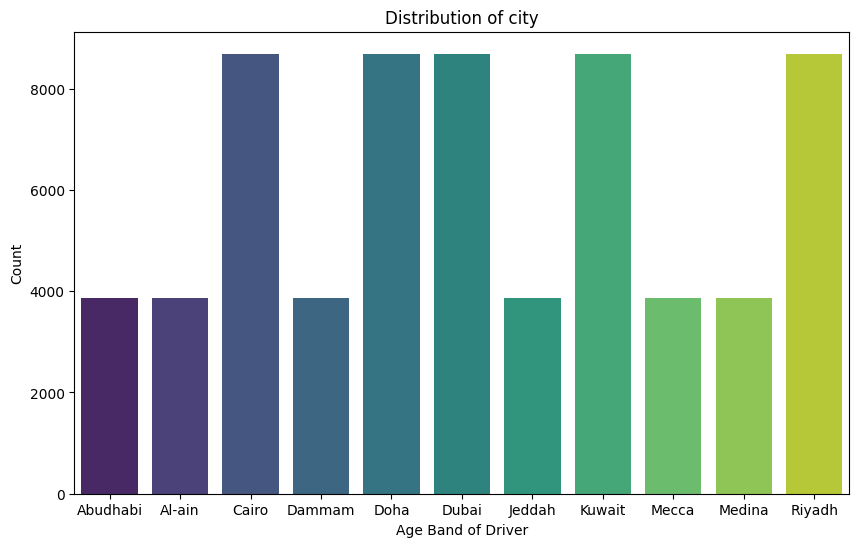

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df, palette='viridis')
plt.title('Distribution of city')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [91]:
city_traffic_index = df.groupby('City')['TrafficIndexLive'].sum().reset_index()

<ipython-input-92-a858256b2f1e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_traffic_index, y='City', x='TrafficIndexLive', palette='viridis')


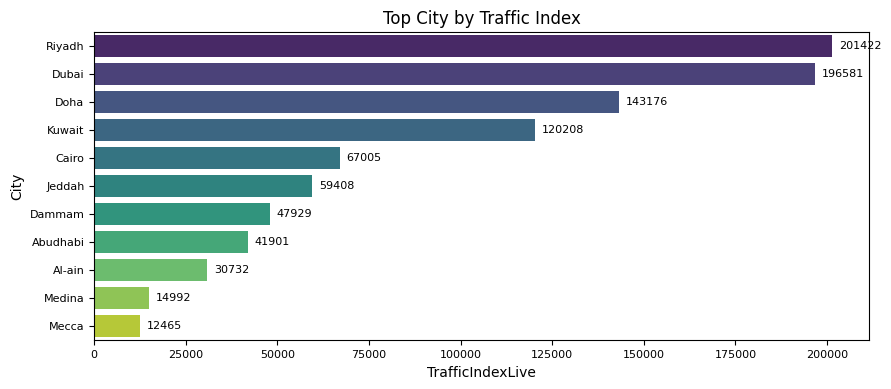

In [92]:
city_traffic_index = city_traffic_index.sort_values(by='TrafficIndexLive', ascending=False)

plt.figure(figsize=(10,4))
plt.xticks(size=8)
plt.yticks(size=8)
sns.barplot(data=city_traffic_index, y='City', x='TrafficIndexLive', palette='viridis')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), \
                ha='left', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Top City by Traffic Index')
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


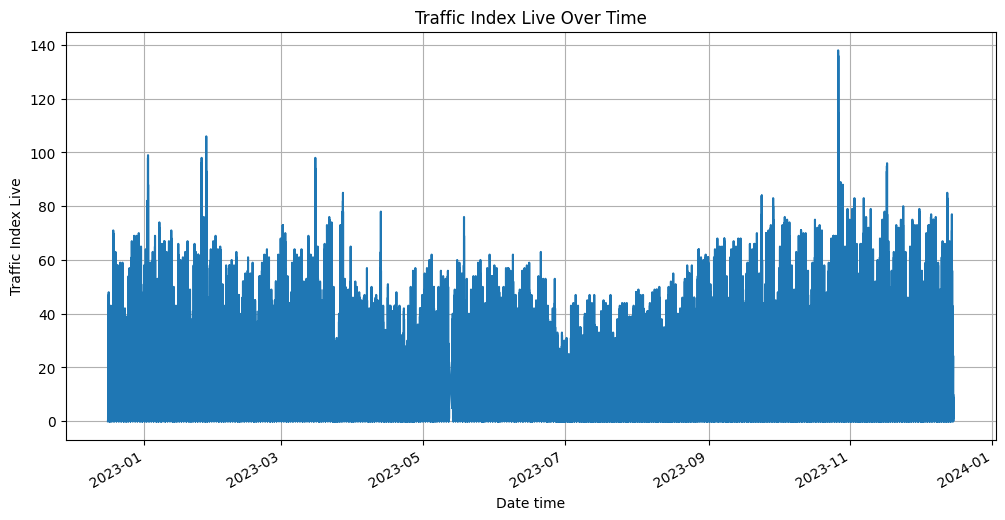

In [94]:
df.set_index('Datetime', inplace=True)
plt.figure(figsize=(12, 6))
df['TrafficIndexLive'].plot.line()
plt.xlabel('Date time')
plt.ylabel('Traffic Index Live')
plt.title('Traffic Index Live Over Time')
plt.grid(True)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [96]:
city_counts = df['City'].value_counts()

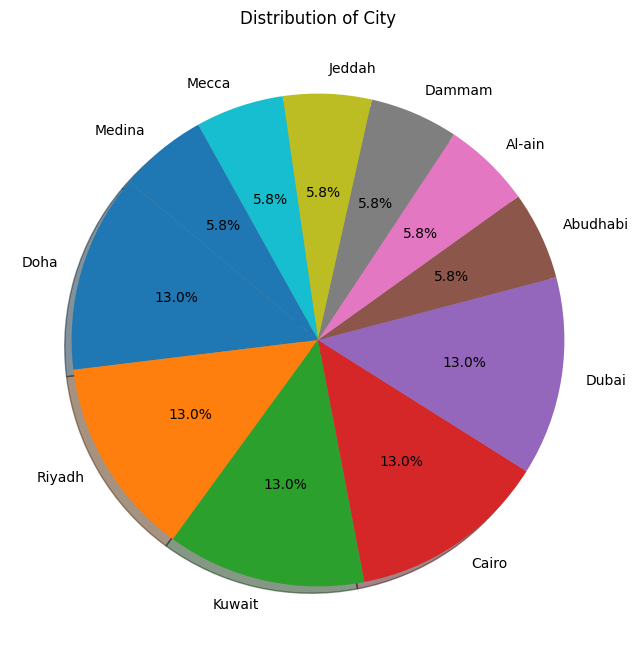

In [97]:
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of City')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
#the capital cities are the most crowded among cities
#riyadh is the most crowde follwed by dubai and finally doha
#also there is a a big increase in real time traffic at septemper 2023 and then go back to normal traffic time